In [106]:
# loading environment
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load the processed data for M10smol
df = pd.read_csv('../../Data/GeneratedData/m10smol_data.csv')

df.head()

,# episode,total_reward,max_reward,ending_time,planes_taken_off,planes_landed,planes_encountered,go_arounds,crashes,processed_planes,reward_efficiency
0,0,279.45,387.5,1411,6,2,10,1,0,0.8,0.721161
1,1,277.15,412.5,1257,4,4,10,1,2,0.8,0.671879
2,2,278.60,437.5,1428,4,3,10,1,0,0.7,0.636800
3,3,250.65,462.5,1487,3,3,10,3,0,0.6,0.541946
4,4,235.35,437.5,1293,4,2,10,3,0,0.6,0.537943


In [107]:
# style choices

plt.style.use('bmh')
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


<h1>Bootstrapped processed planes<h1>

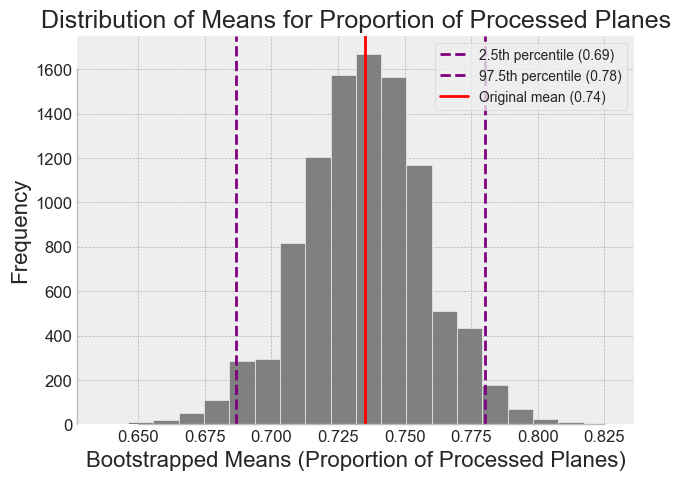

In [115]:
processed_planes = df['processed_planes'].to_numpy()
processed_planes = processed_planes[~np.isnan(processed_planes)]

boots = []
for _ in range(10000):
    sample = np.random.choice(processed_planes, size=30, replace=True)
    boots.append(np.mean(sample))

lower = np.percentile(boots, 2.5)
upper = np.percentile(boots, 97.5)
obs_mean = np.mean(processed_planes)

plt.figure()
plt.hist(boots, bins=20, color='gray')
plt.axvline(lower, linestyle='--', label=f"2.5th percentile ({lower:.2f})", color='purple')
plt.axvline(upper, linestyle='--', label=f"97.5th percentile ({upper:.2f})", color='purple')
plt.axvline(obs_mean, linestyle='-', label=f"Original mean ({obs_mean:.2f})", color='red')
plt.title("Distribution of Means for Proportion of Processed Planes", size=18)
plt.xlabel("Bootstrapped Means (Proportion of Processed Planes)", size=16)
plt.ylabel("Frequency", size=16)
sns.despine(trim=True)
plt.grid(True)
plt.legend()
plt.show()

<h1>Bootstrapped crash rate<h1>

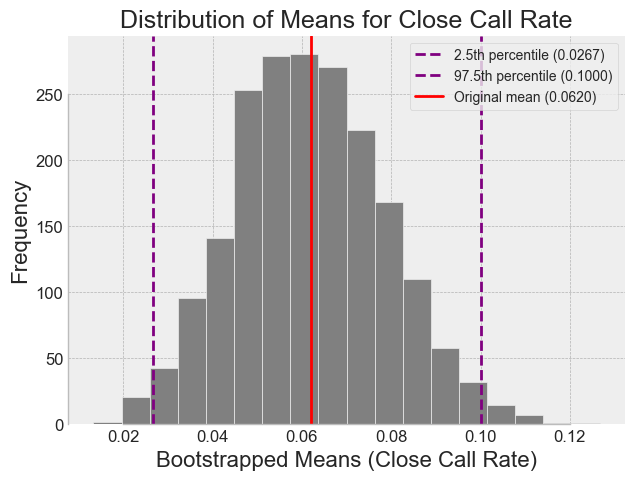

In [109]:
df['crash_rate'] = df['crashes'] / df['planes_encountered']
crash_rate = df['crash_rate'].to_numpy()
crash_rate = crash_rate[~np.isnan(crash_rate)]

boots = []
for _ in range(2000):
	sample = np.random.choice(crash_rate, size=30, replace=True)
	boots.append(np.mean(sample))

lower = np.percentile(boots, 2.5)
upper = np.percentile(boots, 97.5)
obs_mean = np.mean(crash_rate)

plt.figure()
plt.hist(boots, bins=18, color='grey')
plt.axvline(lower, linestyle='--', label=f"2.5th percentile ({lower:.4f})", color='purple')
plt.axvline(upper, linestyle='--', label=f"97.5th percentile ({upper:.4f})", color='purple')
plt.axvline(obs_mean, linestyle='-', label=f"Original mean ({obs_mean:.4f})", color='red')
sns.despine(trim=True)
plt.title("Distribution of Means for Close Call Rate", size=18)
plt.xlabel("Bootstrapped Means (Close Call Rate)", size=16)
plt.ylabel("Frequency", size=16)
plt.legend()
plt.grid(True)
plt.show()


<h1>ECDF<h1>

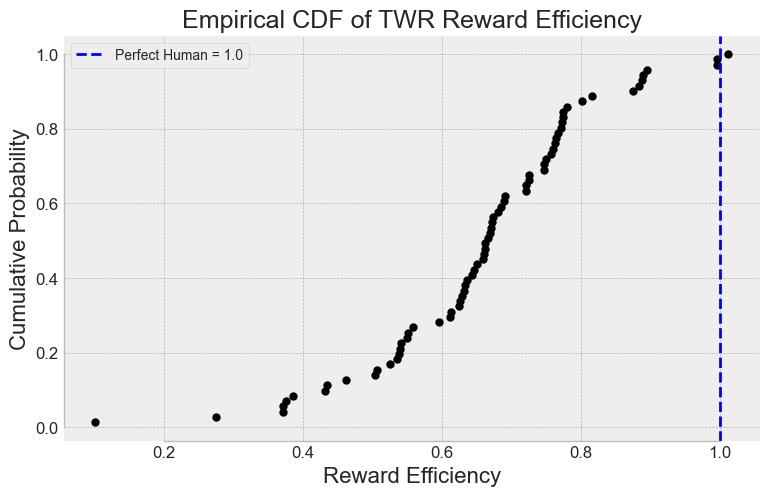

In [110]:
# Sort data
sorted_efficiency = np.sort(df['reward_efficiency'])
cdf = np.arange(1, len(sorted_efficiency) + 1) / len(sorted_efficiency)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(sorted_efficiency, cdf, marker='.', markersize=10, color='black', linestyle='none')
plt.axvline(1.0, color='blue', linestyle='--', label='Perfect Human = 1.0')

sns.despine(trim=True)

plt.title('Empirical CDF of TWR Reward Efficiency', size=18)
plt.xlabel('Reward Efficiency', size=16)
plt.ylabel('Cumulative Probability', size=16)
plt.grid(True)
plt.legend()
plt.show()

<h1>Wilcoxon signed-rank test<h1>

In [111]:
from scipy.stats import wilcoxon

# Assume ai_reward_efficiency is a NumPy array of your data
stat, p_value = wilcoxon(df['reward_efficiency'] - 1.0, alternative='less')

print(f"Wilcoxon statistic: {stat}")
print(f"P-value: {p_value:.20f}")

Wilcoxon statistic: 3.0
P-value: 0.00000000000013807699


<h1>Cohen's d testing<h1>

In [112]:
import numpy as np

# Assuming ai_reward_efficiency is a NumPy array of your data
human_score = 1.0

mean_ai = np.mean(df['reward_efficiency'])
std_ai = np.std(df['reward_efficiency'], ddof=1)  # Use sample std

cohens_d = (mean_ai - human_score) / std_ai

print(f"Cohen's d: {cohens_d:.3f}")

Cohen's d: -2.069


In [113]:
# Cohen's d + confidence intervals

bootstrap_ds = []
for _ in range(10000):
    sample = np.random.choice(df['reward_efficiency'], size=len(df['reward_efficiency']), replace=True)
    mean_sample = np.mean(sample)
    std_sample = np.std(sample, ddof=1)
    bootstrap_ds.append((mean_sample - human_score) / std_sample)

ci_lower = np.percentile(bootstrap_ds, 2.5)
ci_upper = np.percentile(bootstrap_ds, 97.5)

print(f"Bootstrapped CI for Cohen's d: [{ci_lower:.2f}, {ci_upper:.2f}]")

Bootstrapped CI for Cohen's d: [-2.62, -1.73]


<h1>Histogram of reward efficiency<h1>

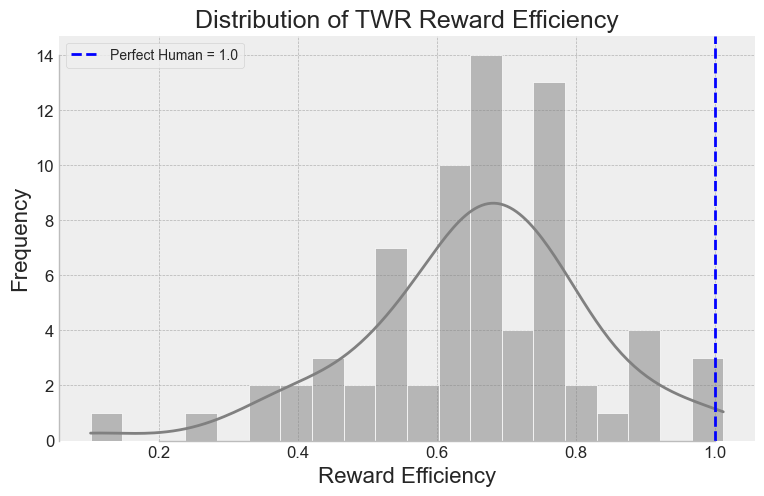

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df['reward_efficiency'], kde=True, color='gray', bins=20, edgecolor='white')
plt.axvline(1.0, color='blue', linestyle='--', label='Perfect Human = 1.0')
sns.despine(trim=True)
plt.title('Distribution of TWR Reward Efficiency', size=18)
plt.xlabel('Reward Efficiency', size=16)
plt.ylabel('Frequency', size=16)
plt.legend()
plt.grid(True)
plt.show()